# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

## 1. Download the dataset [1 point]

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 2. Load the dataset [1 point]

In [21]:
data=pd.read_csv("financial_news_headlines_sentiment.csv",encoding='latin1')

In [46]:
data.columns = ["status", "text"]

## 3. Explore the dataset [10 points]

In [52]:
print(data.head())  # Display the first few rows
print(data.info())  # Overview of columns and data types
print(data['status'].value_counts())  # Check the distribution of sentiments
# Perform other EDA as needed


     status                                               text  status_n
0   neutral  Technopolis plans to develop in stages an area...         1
1  negative  The international electronic industry company ...         0
2  positive  With the new production plant the company woul...         2
3  positive  According to the company 's updated strategy f...         2
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...         2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   status    4845 non-null   object
 1   text      4845 non-null   object
 2   status_n  4845 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 94.8+ KB
None
neutral     2878
positive    1363
negative     604
Name: status, dtype: int64


<Axes: >

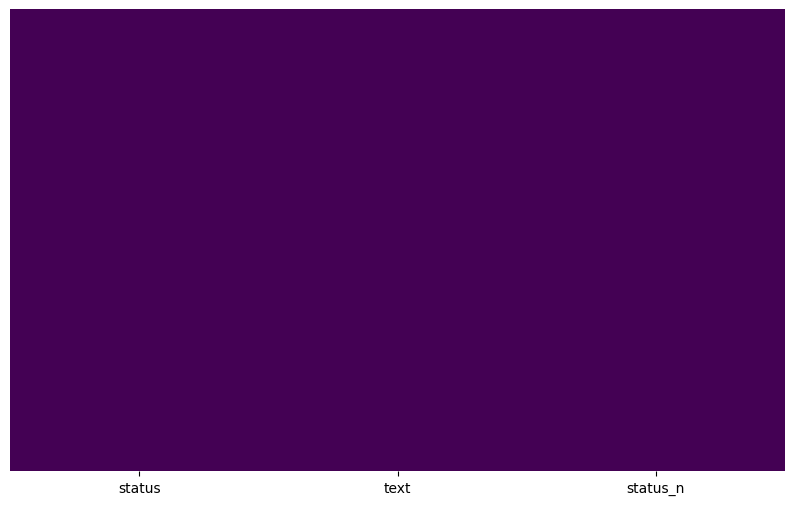

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(), cbar=False, cmap='viridis', yticklabels=False)

## 4. Clean the data [5 points]

In [58]:
# Clean the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["status_n"] = le.fit_transform(data["status"])

data


,status,text,status_n
0,neutral,Technopolis plans to develop in stages an area...,1
1,negative,The international electronic industry company ...,0
2,positive,With the new production plant the company woul...,2
3,positive,According to the company 's updated strategy f...,2
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,2
...,...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...,0
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,1
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...,0
4843,negative,Net sales of the Paper segment decreased to EU...,0


## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

## 6. BoW model [15 points]

In [62]:
import nltk
import re
text = data.text.tolist()
for i in range(len(text)):
    text [i] = text [i].lower()
    text [i] = re.sub(r'\W',' ',text [i])
    text [i] = re.sub(r'\s+',' ',text [i])



In [63]:
wordfreq = {}
for sentence in text:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [64]:
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

In [65]:
sentence_vectors = []
for sentence in text:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [66]:

sentence_vectors = np.asarray(sentence_vectors)

In [68]:
bow=pd.DataFrame(sentence_vectors, columns=most_freq)

bow


,the,of,in,and,to,a,for,s,eur,is,...,news,system,people,growth,line,now,billion,acquisition,ltd,report
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,1,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4841,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4842,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4843,1,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## 7. Tf-idf model [15 points]

In [69]:
word_idf_values = {}
for token in most_freq:
    doc_containing_word = 0
    for document in text:
        if token in nltk.word_tokenize(document):
            doc_containing_word += 1
    word_idf_values[token] = np.log(len(text)/(1 + doc_containing_word))


In [70]:
word_tf_values = {}
for token in most_freq:
    sent_tf_vector = []
    for document in text:
        doc_freq = 0
        for word in nltk.word_tokenize(document):
            if token == word:
                  doc_freq += 1
        word_tf = doc_freq/len(nltk.word_tokenize(document))
        sent_tf_vector.append(word_tf)
    word_tf_values[token] = sent_tf_vector
    

In [71]:
tfidf_values = []
for token in word_tf_values.keys():
    tfidf_sentences = []
    for tf_sentence in word_tf_values[token]:
        tf_idf_score = tf_sentence * word_idf_values[token]
        tfidf_sentences.append(tf_idf_score)
    tfidf_values.append(tfidf_sentences)

In [72]:
tf_idf_model = np.asarray(tfidf_values)

In [73]:
tf_idf_model = np.transpose(tf_idf_model)

In [75]:
tfidf = pd.DataFrame(tf_idf_model, columns=most_freq)
tfidf

,the,of,in,and,to,a,for,s,eur,is,...,news,system,people,growth,line,now,billion,acquisition,ltd,report
0,0.011329,0.024878,0.078631,0.029997,0.058191,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.041196,0.045233,0.000000,0.000000,0.026451,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.053104,0.023323,0.024572,0.056245,0.027277,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.027556,0.060514,0.021252,0.000000,0.023591,0.032754,0.042620,0.042919,0.000000,0.000000,...,0.0,0.0,0.0,0.116109,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.031098,0.000000,0.000000,0.000000,0.000000,0.000000,0.066167,0.000000,0.070838,...,0.0,0.0,0.0,0.358004,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,0.014161,0.000000,0.065526,0.000000,0.036370,0.050497,0.065706,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4841,0.000000,0.000000,0.000000,0.000000,0.056314,0.000000,0.000000,0.051226,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4842,0.000000,0.031098,0.032763,0.000000,0.036370,0.000000,0.000000,0.000000,0.255594,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4843,0.021693,0.047639,0.033460,0.000000,0.037143,0.000000,0.000000,0.000000,0.174022,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 8. Split train test data [3 points]

In [77]:
from sklearn.model_selection import train_test_split
#tdidf
X_train, X_test, y_train, y_test = train_test_split(tfidf, data.status_n, random_state = 42, test_size= 0.2)

In [79]:
#bow
X_train1, X_test1, y_train1, y_test1 = train_test_split(bow, data.status_n, random_state = 42, test_size= 0.2)

## 9. Classification Algorithm [10 points]
- Train
- Predict

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)


In [83]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [84]:
yfit_rf=rf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [85]:
accuracy_score(y_test,yfit_rf)

0.7234262125902993

In [86]:

rf.fit(X_train1, y_train1)
yfit_rf1=rf.predict(X_test1)
accuracy_score(y_test1,yfit_rf1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7223942208462333

## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [87]:
from sklearn.svm import SVC
svc = SVC(kernel = "rbf", C = 100, class_weight = "balanced")
svc.fit(X_train, y_train)

SVC(C=100, class_weight='balanced')

In [89]:
SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
yfit_svc=svc.predict(X_test)

accuracy_score(y_test,yfit_svc)

0.6790505675954592

In [91]:
#Using bow

svc.fit(X_train1, y_train1)
yfit_svc1=svc.predict(X_test1)
accuracy_score(y_test1,yfit_svc1)

0.6635706914344686

## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

Text(95.72222222222221, 0.5, 'Predictions')

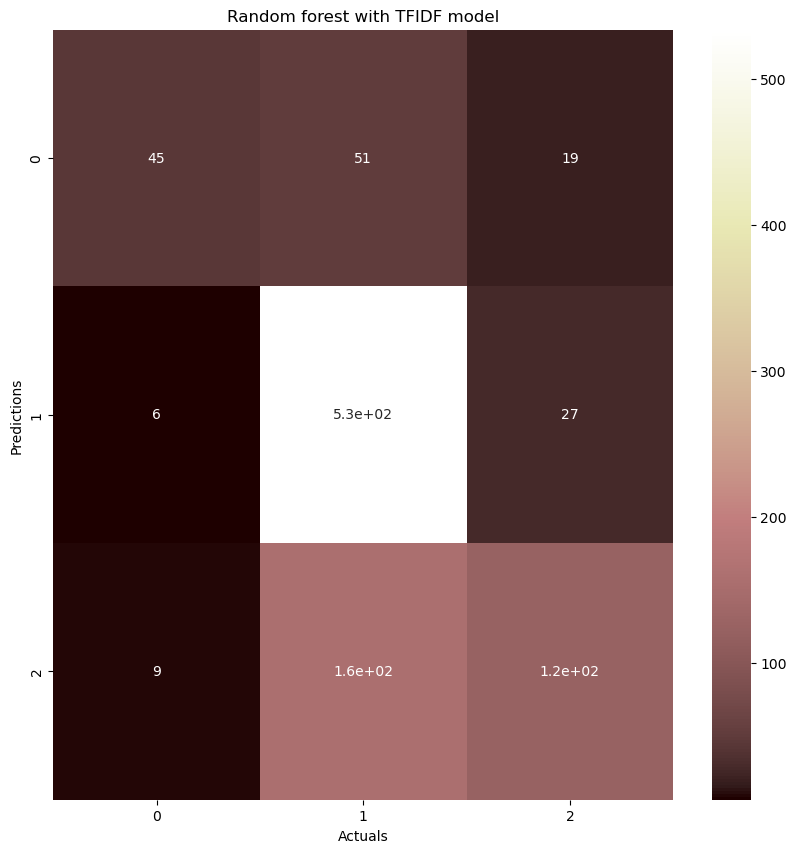

In [105]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, yfit_rf)

plt.figure(figsize = (10,10))
sns.heatmap(mat, annot = True,cmap='pink')
plt.title("Random forest with TFIDF model")
plt.xlabel("Actuals")
plt.ylabel("Predictions")

Text(95.72222222222221, 0.5, 'Predictions')

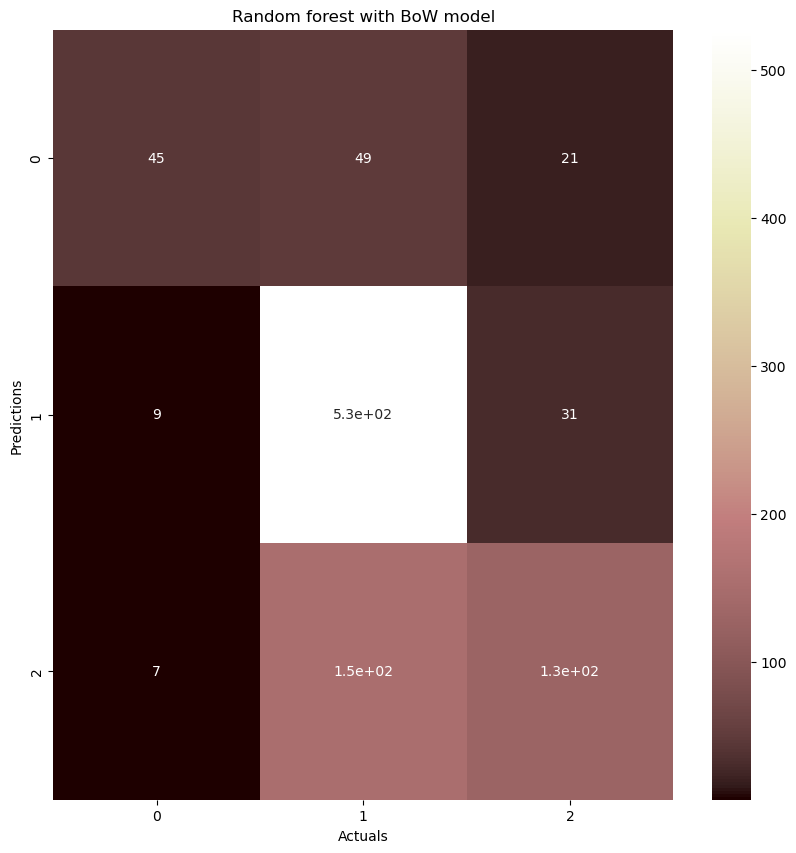

In [106]:
mat = confusion_matrix(y_test1, yfit_rf1)

plt.figure(figsize = (10,10))
sns.heatmap(mat, annot = True,cmap='pink')
plt.title("Random forest with BoW model")
plt.xlabel("Actuals")
plt.ylabel("Predictions")

Text(95.72222222222221, 0.5, 'Predictions')

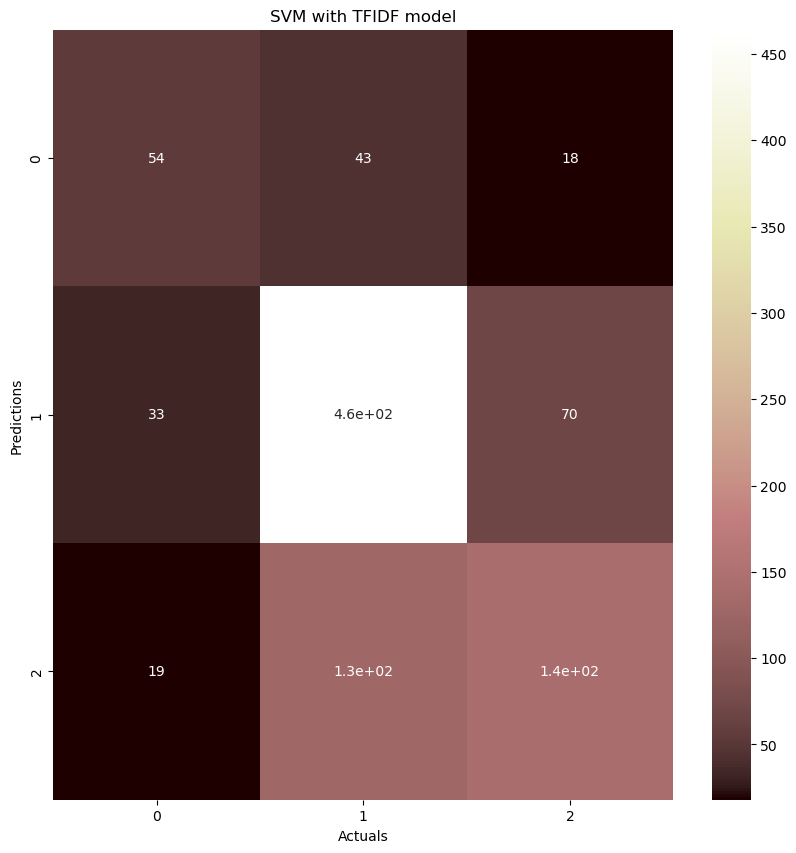

In [107]:
mat = confusion_matrix(y_test, yfit_svc)

plt.figure(figsize = (10,10))
sns.heatmap(mat, annot = True,cmap='pink')
plt.title("SVM with TFIDF model")
plt.xlabel("Actuals")
plt.ylabel("Predictions")

Text(95.72222222222221, 0.5, 'Predictions')

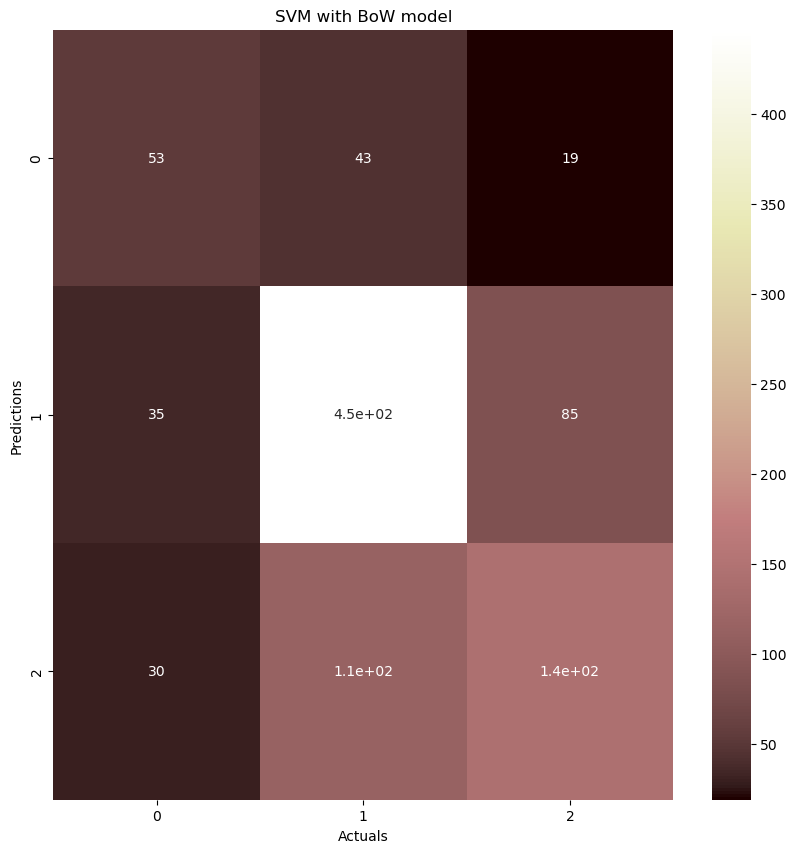

In [108]:
mat = confusion_matrix(y_test1, yfit_svc1)

plt.figure(figsize = (10,10))
sns.heatmap(mat, annot = True,cmap='pink')
plt.title("SVM with BoW model")
plt.xlabel("Actuals")
plt.ylabel("Predictions")